<a href="https://colab.research.google.com/github/ssaket/visual-perception/blob/main/models/fashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import seaborn as sns

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
print(x_train[0].shape)

(28, 28, 1)


In [6]:
K = len(set(y_train))

In [7]:
#Build the model using Funcitonal API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

In [8]:
model = Model(i, x)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 41s 6ms/step - loss: 0.5150 - accuracy: 0.8100 - val_loss: 0.4270 - val_accuracy: 0.8420
Epoch 2/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3602 - accuracy: 0.8640 - val_loss: 0.3432 - val_accuracy: 0.8708
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3116 - accuracy: 0.8831 - val_loss: 0.3258 - val_accuracy: 0.8821
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2809 - accuracy: 0.8949 - val_loss: 0.3181 - val_accuracy: 0.8823
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2537 - accuracy: 0.9043 - val_loss: 0.3034 - val_accuracy: 0.8930
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2359 - accuracy: 0.9101 - val_loss: 0.2841 - val_accuracy: 0.8996
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2148 - accuracy: 0.9186 - val_loss: 0.2846 - val_ac

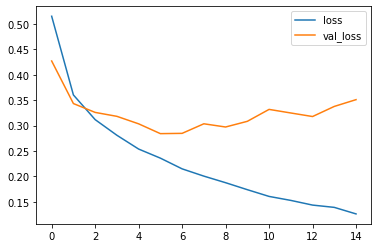

In [21]:
sns.lineplot(x=range(len(r.history['loss'])), y=r.history['loss'], label='loss')
sns.lineplot(x=range(len(r.history['val_loss'])), y=r.history['val_loss'], label='val_loss')

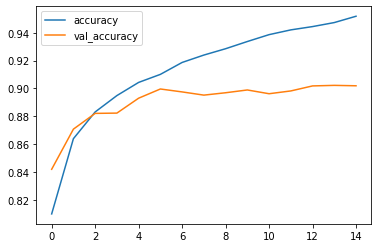

In [30]:
sns.lineplot(x=range(len(r.history['accuracy'])), y=r.history['accuracy'], label='accuracy')
sns.lineplot(x=range(len(r.history['val_accuracy'])), y=r.history['val_accuracy'], label='val_accuracy')

In [38]:
p_test = model.predict(x_test).argmax(axis=1)

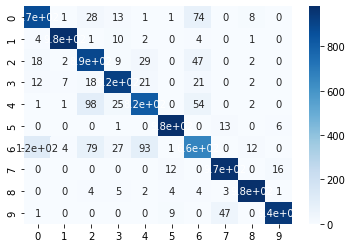

In [44]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, p_test)
sns.heatmap(cf_matrix, annot=True, cmap='Blues')

In [61]:
labels = [
          'T-shirt/top',
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankel Boot'
]

In [67]:
#show misclassified examples
missclassified_idx = np.where(p_test != y_test)[0]

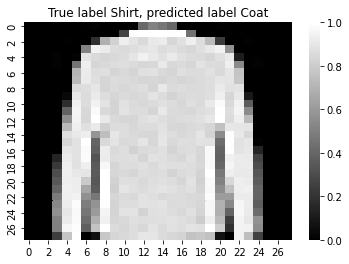

In [70]:
import matplotlib.pyplot as plt
ax = plt.axes()
idx = np.random.choice(missclassified_idx)
sns.heatmap(x_test[idx].reshape(28, 28), cmap='gray', ax=ax)
ax.set_title('True label %s, predicted label %s' % (labels[y_test[idx]], labels[p_test[idx]]));